In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline

In [5]:
df = pd.read_csv("/content/sample_data/heart_disease_health_indicators.csv.zip")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [6]:
df.shape

(253661, 22)

In [7]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [9]:
df.isnull().sum()

,0
HeartDiseaseorAttack,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
Diabetes,0
PhysActivity,0
Fruits,0


In [10]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000
mean,0.094173,0.428990,0.424113,0.962667,28.382475,0.443186,0.040570,0.296904,0.756577,0.634264,0.811437,0.056201,0.951049,0.084164,2.511379,3.184778,4.242028,0.168221,0.440348,8.032197,5.050461,6.054052
std,0.292070,0.494933,0.494209,0.189578,6.608638,0.496763,0.197292,0.698147,0.429149,0.481637,0.391162,0.230310,0.215766,0.277633,1.068472,7.412822,8.717905,0.374063,0.496430,3.054203,0.985718,2.071036
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


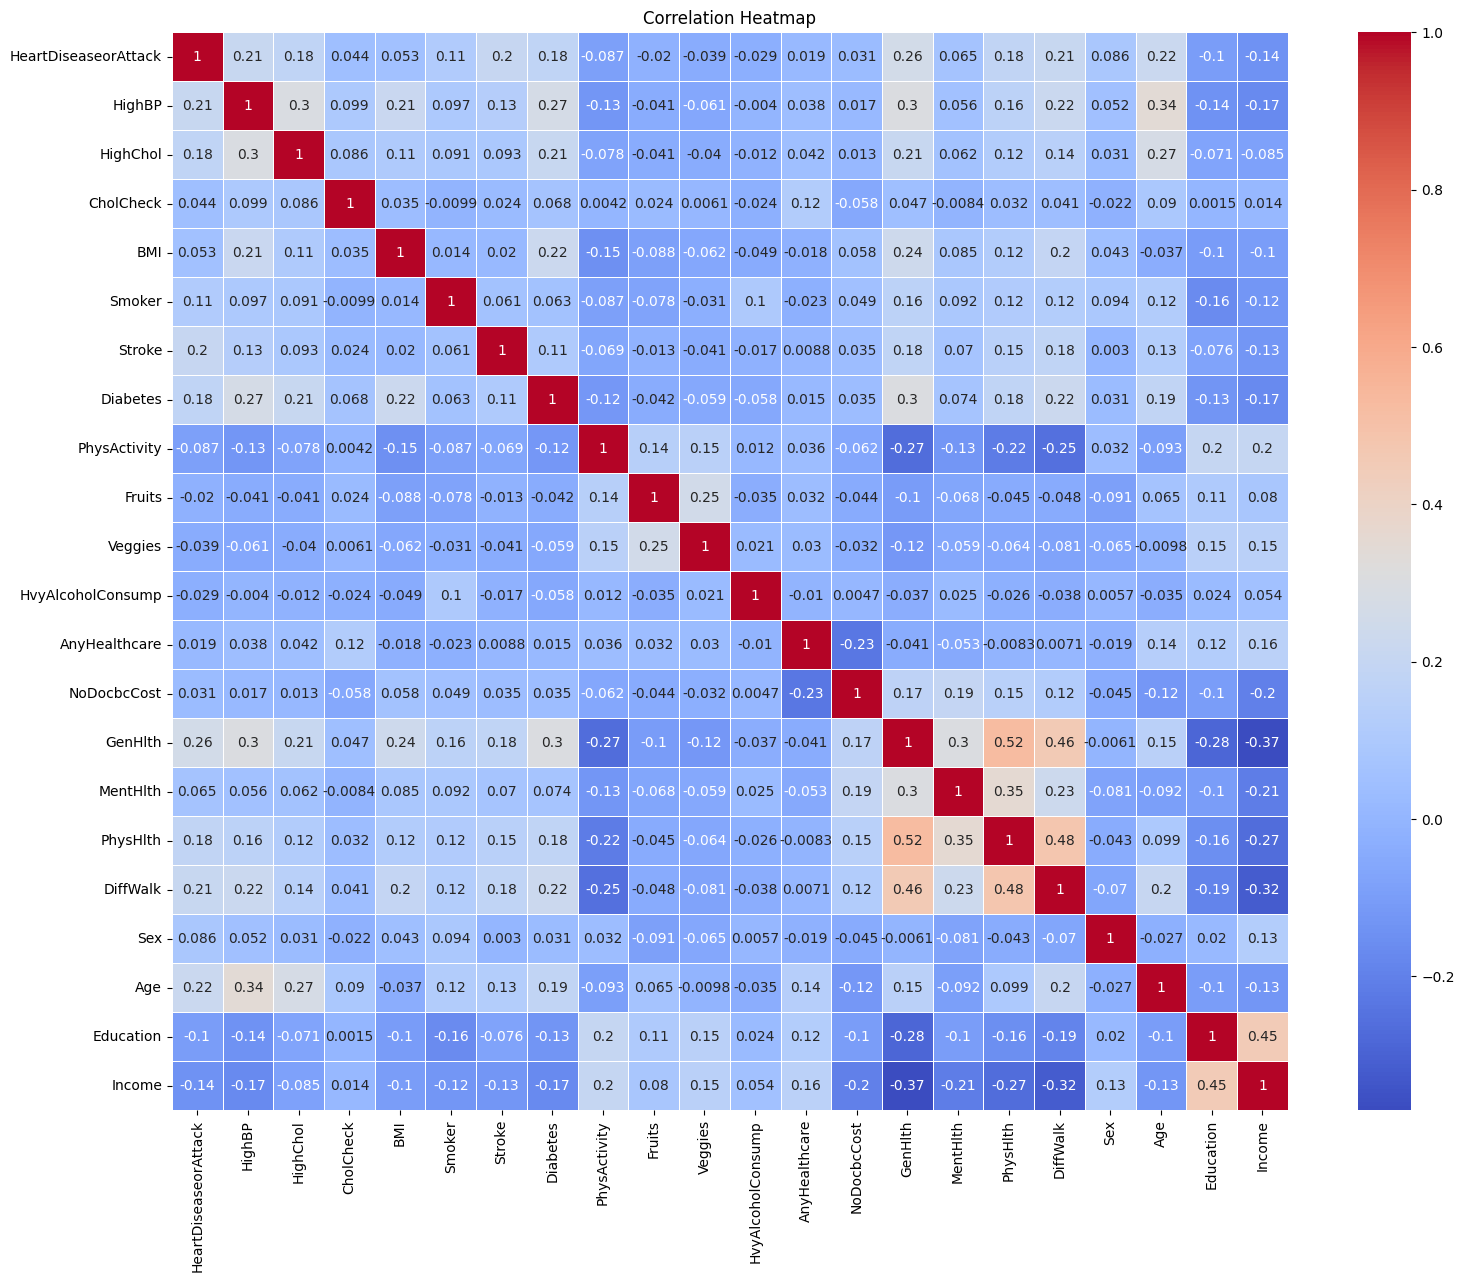

In [11]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'cente

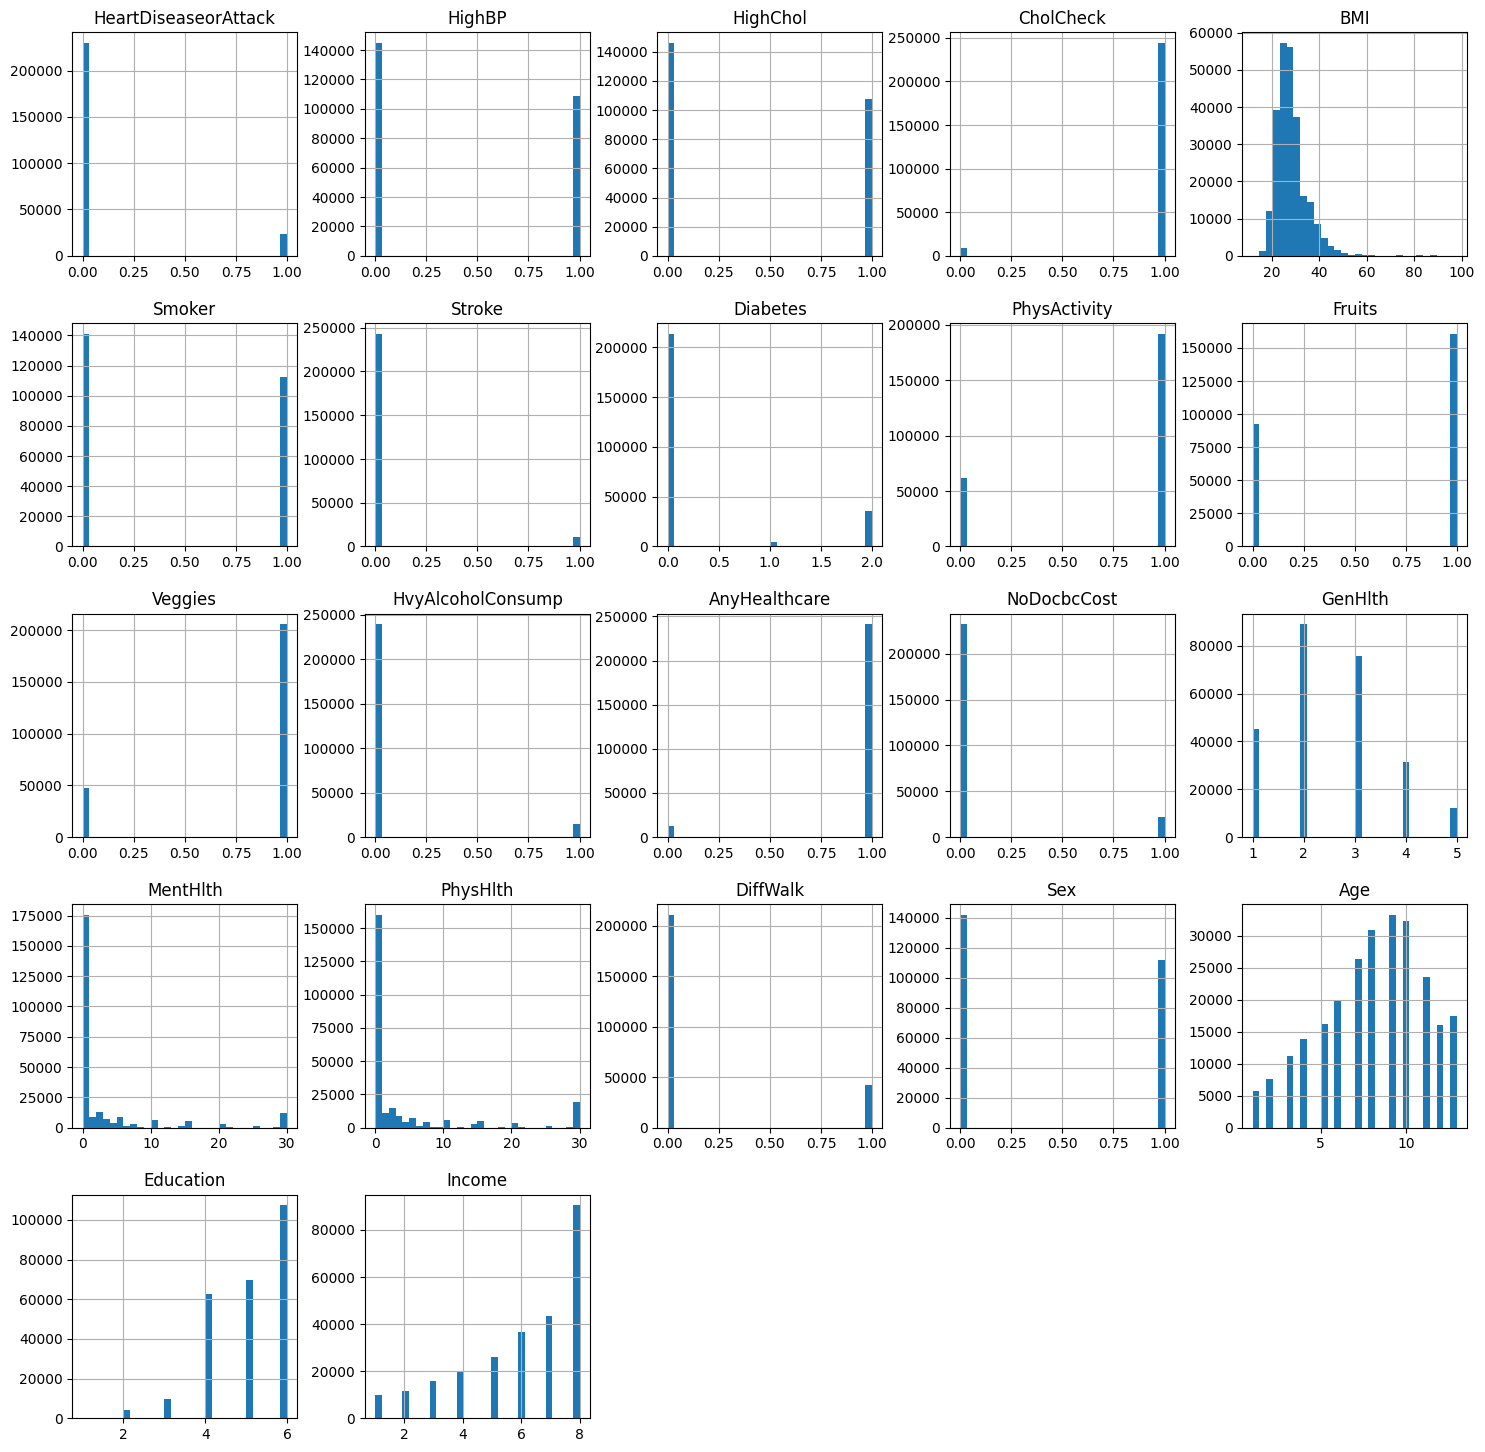

In [12]:
df.hist(figsize = (18, 18), bins = 30)

In [13]:
#Separating into features variables and target variable.

X = df.drop(columns=['HeartDiseaseorAttack'])  # Features
y = df['HeartDiseaseorAttack']  # Target variable
print(y.shape)
print(X.shape)

(253661,)
(253661, 21)


In [14]:
# Separating Independent and Label data

print(f"Shape of Independent Data :{X.shape}")
print(f"Shape of Label Data :{y.shape}")

# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of X_test is {X_test.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of Independent Data :(253661, 21)
Shape of Label Data :(253661,)
Shape of X_train is (202928, 21)
Shape of y_train is (202928,)
Shape of X_test is (50733, 21)
Shape of y_test is (50733,)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv("/content/sample_data/heart_disease_health_indicators.csv.zip")  # Replace "your_data.csv" with your file name

# Separate features and target variable
X = data.drop(columns=["HeartDiseaseorAttack"])  # Replace with actual target column name if different
y = data["HeartDiseaseorAttack"]

# Optional: Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize three chosen classifiers for faster runtime
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),  # Adjust as needed
    "Random Forest": RandomForestClassifier(n_estimators=50)  # Lowered n_estimators for faster training
}

# Evaluate each model with cross-validation
best_model = None
best_accuracy = 0
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)  # Fewer folds and parallel
    mean_score = scores.mean()
    print(f"{model_name} Accuracy: {mean_score:.4f}")

    # Update best model if current model's accuracy is higher
    if mean_score > best_accuracy:
        best_accuracy = mean_score
        best_model = model

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Test accuracy on the test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Model: {best_model.__class__.__name__}")
print(f"Cross-validated Accuracy: {best_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Logistic Regression Accuracy: 0.9069
K-Nearest Neighbors Accuracy: 0.8962
Random Forest Accuracy: 0.9017

Best Model: LogisticRegression
Cross-validated Accuracy: 0.9069
Test Accuracy: 0.9096


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv("/content/sample_data/heart_disease_health_indicators.csv.zip")  # Replace "your_data.csv" with your file name

# Separate features and target variable
X = data.drop(columns=["HeartDiseaseorAttack"])  # Replace with actual target column name if different
y = data["HeartDiseaseorAttack"]

# Optional: Scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base models
log_reg = LogisticRegression(max_iter=500)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=50)  # Lowered n_estimators for faster training

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ("Logistic Regression", log_reg),
        ("K-Nearest Neighbors", knn),
        ("Random Forest", rf)
    ],
    final_estimator=LogisticRegression(),  # Meta-model
    cv=3,  # Cross-validation for meta-model training
    n_jobs=-1
)

# Evaluate the Stacking Classifier with cross-validation
stacking_scores = cross_val_score(stacking_clf, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
stacking_mean_score = stacking_scores.mean()
print(f"Stacking Classifier Cross-validated Accuracy: {stacking_mean_score:.4f}")

# Train the Stacking Classifier on the full training data
stacking_clf.fit(X_train, y_train)

# Test accuracy on the test set
y_pred_stacking = stacking_clf.predict(X_test)
stacking_test_accuracy = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Test Accuracy: {stacking_test_accuracy:.4f}")


Stacking Classifier Cross-validated Accuracy: 0.9058
Stacking Classifier Test Accuracy: 0.9086


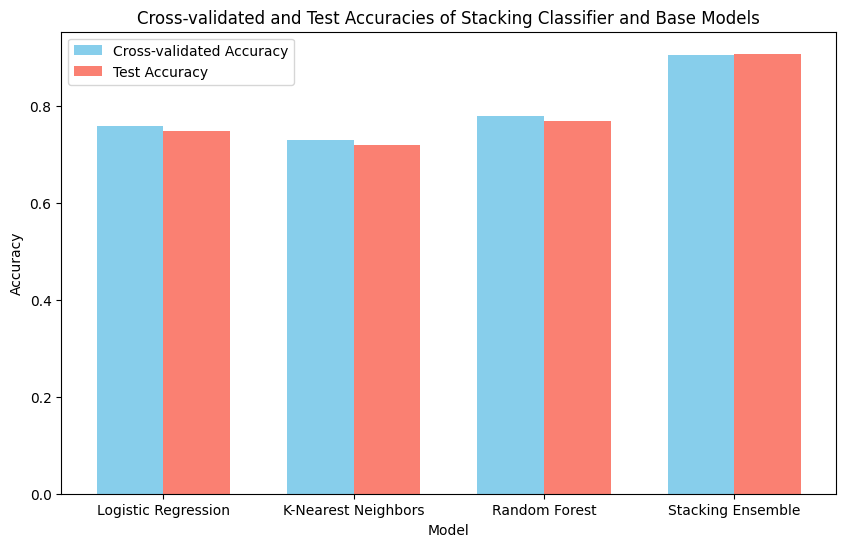

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these are the cross-validated and test accuracies for each base model and the stacking model
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Stacking Ensemble"]
cross_val_accuracies = [0.76, 0.73, 0.78, stacking_mean_score]  # Replace with actual cross-validation accuracies
test_accuracies = [0.75, 0.72, 0.77, stacking_test_accuracy]     # Replace with actual test accuracies

# Bar chart for cross-validated and test accuracies
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, cross_val_accuracies, width, label='Cross-validated Accuracy', color='skyblue')
bar2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='salmon')

# Labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validated and Test Accuracies of Stacking Classifier and Base Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Display bar chart
plt.show()


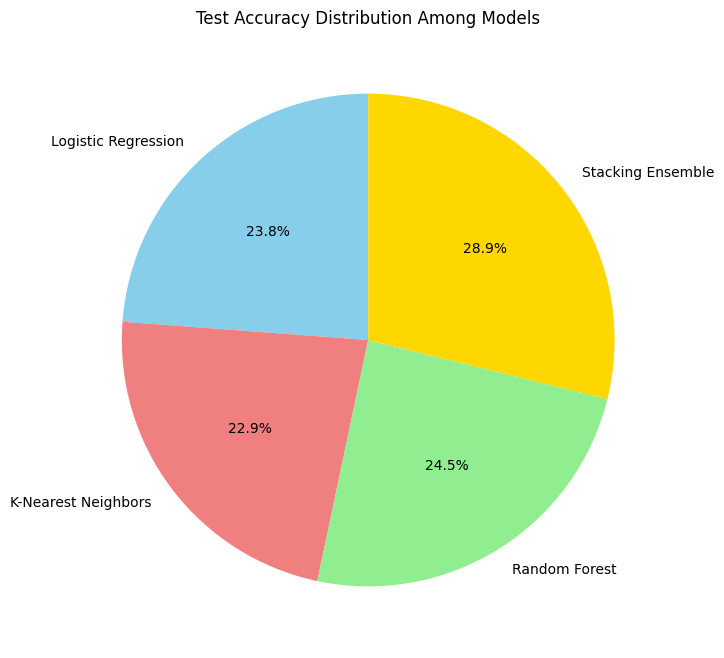

In [19]:
import matplotlib.pyplot as plt

# Assume these are the test accuracies for each model
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Stacking Ensemble"]
test_accuracies = [0.75, 0.72, 0.77, stacking_test_accuracy]  # Replace with actual test accuracies

# Pie chart for test accuracy distribution
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(test_accuracies, labels=model_names, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
ax.set_title("Test Accuracy Distribution Among Models")

# Display pie chart
plt.show()


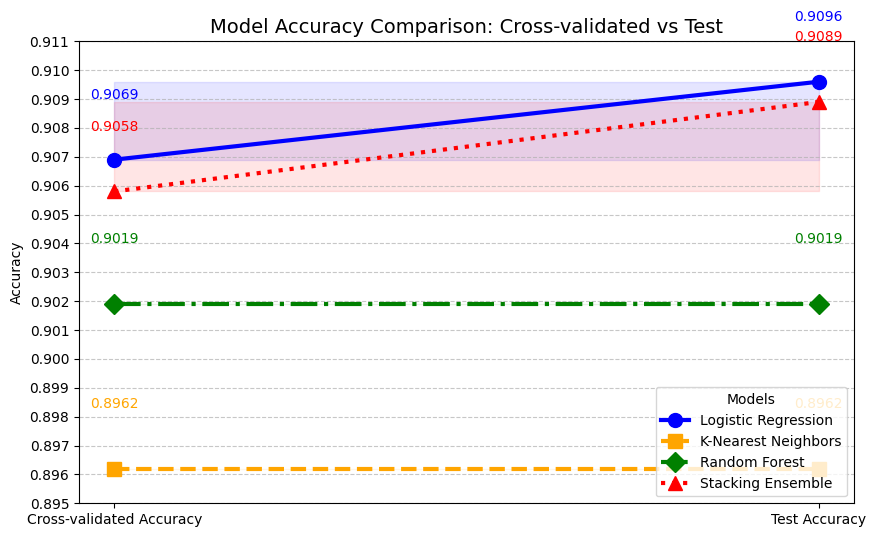

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their respective accuracies
model_names = ["Logistic Regression", "K-Nearest Neighbors", "Random Forest", "Stacking Ensemble"]
cross_val_accuracies = [0.9069, 0.8962, 0.9019, 0.9058]  # Cross-validated accuracies
test_accuracies = [0.9096, 0.8962, 0.9019, 0.9089]        # Test accuracies

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Slope Chart
colors = ['blue', 'orange', 'green', 'red']
markers = ['o', 's', 'D', '^']  # Different marker styles for each model
line_styles = ['-', '--', '-.', ':']  # Different line styles for each model

# Plot the lines and shaded areas
for i in range(len(model_names)):
    plt.plot([0, 1], [cross_val_accuracies[i], test_accuracies[i]],
             marker=markers[i], markersize=10, color=colors[i],
             linewidth=3, linestyle=line_styles[i], label=model_names[i])

    # Add shaded area between points for better visibility
    plt.fill_between([0, 1],
                     [cross_val_accuracies[i]]*2,
                     [test_accuracies[i]]*2,
                     color=colors[i], alpha=0.1)

    # Annotate the accuracy values
    plt.text(0, cross_val_accuracies[i] + 0.002, f'{cross_val_accuracies[i]:.4f}',
             ha='center', va='bottom', fontsize=10, color=colors[i])
    plt.text(1, test_accuracies[i] + 0.002, f'{test_accuracies[i]:.4f}',
             ha='center', va='bottom', fontsize=10, color=colors[i])

# Customize the slope chart
plt.xticks([0, 1], ['Cross-validated Accuracy', 'Test Accuracy'])
plt.yticks(np.arange(0.895, 0.911, 0.001))  # Set y-ticks to a smaller range for zoom effect
plt.ylim(0.895, 0.911)  # Set limits to zoom in on accuracies
plt.ylabel('Accuracy')

# Updated title
plt.title('Model Accuracy Comparison: Cross-validated vs Test', fontsize=14)

# Add legend at the bottom right corner
plt.legend(title='Models', loc='lower right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the slope chart
plt.show()


In [21]:
import joblib
joblib.dump(best_model, 'best_model.pkl')  # Save your model


['best_model.pkl']

In [22]:
import joblib
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

In [23]:
import joblib
import numpy as np

# Load the model
model = joblib.load('best_model.pkl')

# Test input (replace with real feature values as appropriate)
# Example input format: [HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, ...]
test_input = np.array([[1, 1, 1, 28.0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 2, 3, 0, 0, 55, 4, 3]])

# Predict the outcome
prediction = model.predict(test_input)

# Interpret the result
result = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'
print(f"Prediction: {result}")


Prediction: Heart Disease


In [30]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your saved model
model = joblib.load('/content/best_model.pkl')

# Example test data: replace with actual values or read from a CSV file
# Ensure this data has the same columns as used in model training
X_test = pd.DataFrame({
    'HighBP': [1],
    'HighChol': [1],
    'CholCheck': [1],
    'BMI': [28.0],
    'Smoker': ['Yes'],  # Categorical example
    'Stroke': [0],
    'Diabetes': [0],
    'PhysActivity': [1],
    'Fruits': [1],
    'Veggies': [1],
    'HvyAlcoholConsump': [0],
    'AnyHealthcare': [1],
    'NoDocbcCost': [0],
    'GenHlth': [3],
    'MentHlth': [2],
    'PhysHlth': [3],
    'DiffWalk': [0],
    'Sex': ['Male'],  # Categorical example
    'Age': [55],
    'Education': [4],
    'Income': [3]
})

# Step 1: Convert Categorical Columns
# Identify categorical columns (those with non-numeric data)
categorical_columns = X_test.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

# Step 2: Handle Missing Values (if any)
X_test = X_test.fillna(X_test.mean())  # Fill NaN with column mean

# Step 3: Scale Features (if you scaled them during training)
# Assuming StandardScaler was used, load the scaler and transform X_test
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Step 4: Prediction
# Ensure X_test is in the right shape (1, -1) for single prediction if needed
if X_test.ndim == 1:
    X_test = X_test.reshape(1, -1)

# Predict using the model
prediction = model.predict(X_test)
result = 'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'

# Output the result
print(f"Prediction: {result}")


Prediction: No Heart Disease


In [33]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the pre-trained model
model = joblib.load('/content/best_model.pkl')

# Sample high-risk case
X_test = pd.DataFrame({
    'HighBP': [1],
    'HighChol': [1],
    'CholCheck': [1],
    'BMI': [35.0],         # Higher BMI, common risk factor
    'Smoker': ['Yes'],
    'Stroke': [1],
    'Diabetes': [1],
    'PhysActivity': [0],   # Lack of physical activity
    'Fruits': [0],
    'Veggies': [0],
    'HvyAlcoholConsump': [1],
    'AnyHealthcare': [1],
    'NoDocbcCost': [0],
    'GenHlth': [4],        # Poor general health
    'MentHlth': [15],
    'PhysHlth': [20],
    'DiffWalk': [1],
    'Sex': ['Male'],
    'Age': [65],
    'Education': [2],
    'Income': [1]
})

# Step 1: Encode Categorical Features
categorical_columns = X_test.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X_test[col] = le.fit_transform(X_test[col])

# Step 2: Scale the Data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Step 3: Prediction with Probabilities
prediction_prob = model.predict_proba(X_test)
prediction = model.predict(X_test)

# Custom threshold (e.g., 0.4 instead of the default 0.5)
threshold = 0.4
predicted_class = 1 if prediction_prob[0][1] >= threshold else 0
result = 'Heart Disease Detected' if predicted_class == 1 else 'No Heart Disease Detected'

# Display results
print(f"Prediction Probability for Heart Disease: {prediction_prob[0][1]:.4f}")
print(f"Prediction Result: {result}")


Prediction Probability for Heart Disease: 0.0433
Prediction Result: No Heart Disease Detected
